In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

In [ ]:
df = pd.read_csv("./wildfire-data.csv")

# Initial information about Data
We will use a few simple commands to get a general sense of the data. This includes:
- the shape of the data
- the number of missing values
- numerical summaries of features

In [ ]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,6/28/21 22:26,0.01,7/1/21 13:26,10.00,NaN,NaN,7/1/21 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,3/30/21 14:30,0.01,3/30/21 14:30,0.01,3/30/21 14:35,0.01,4/9/21 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,4/16/21 16:57,0.10,4/16/21 16:57,0.10,NaN,NaN,4/17/21 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,4/17/21 15:20,0.01,4/17/21 15:20,0.01,NaN,NaN,4/17/21 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,4/1/21 19:10,7.13,4/2/21 11:00,7.13,4/2/21 15:52,7.13,4/12/21 14:30,7.13


In [ ]:
df.shape

(22914, 50)

In [ ]:
df.columns

Index(['fire_year', 'fire_number', 'fire_name', 'current_size', 'size_class',
       'fire_location_latitude', 'fire_location_longitude', 'fire_origin',
       'general_cause_desc', 'industry_identifier_desc',
       'responsible_group_desc', 'activity_class', 'true_cause',
       'fire_start_date', 'det_agent', 'det_agent_type', 'discovered_date',
       'discovered_size', 'reported_date', 'dispatched_resource',
       'dispatch_date', 'start_for_fire_date', 'assessment_resource',
       'assessment_datetime', 'assessment_hectares', 'fire_spread_rate',
       'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire',
       'temperature', 'relative_humidity', 'wind_direction', 'wind_speed',
       'fuel_type', 'initial_action_by', 'ia_arrival_at_fire_date',
       'ia_access', 'fire_fighting_start_date', 'fire_fighting_start_size',
       'bucketing_on_fire', 'distance_from_water_source',
       'first_bucket_drop_date', 'bh_fs_date', 'bh_hectares', 'uc_fs_date',
       'u

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     22914 non-null  int64  
 1   fire_number                   22914 non-null  object 
 2   fire_name                     604 non-null    object 
 3   current_size                  22914 non-null  float64
 4   size_class                    22914 non-null  object 
 5   fire_location_latitude        22914 non-null  float64
 6   fire_location_longitude       22914 non-null  float64
 7   fire_origin                   22905 non-null  object 
 8   general_cause_desc            22914 non-null  object 
 9   industry_identifier_desc      408 non-null    object 
 10  responsible_group_desc        9031 non-null   object 
 11  activity_class                14204 non-null  object 
 12  true_cause                    12488 non-null  object 
 13  f

In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
fire_year,22914.0,2012.820896,4.517263,2006.000000,2009.000000,2013.000000,2016.000000,2021.000000
current_size,22914.0,155.060680,5906.681475,0.010000,0.010000,0.020000,0.300000,577646.800000
fire_location_latitude,22914.0,54.953780,2.642913,48.998195,53.075638,55.300575,56.797629,59.999510
fire_location_longitude,22914.0,-115.222288,2.309475,-119.999983,-116.791542,-115.151046,-114.330646,-110.000917
discovered_size,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
assessment_hectares,22914.0,2.154478,60.137154,0.010000,0.010000,0.010000,0.200000,6019.000000
fire_spread_rate,20305.0,0.869692,2.573896,-1.000000,0.000000,0.000000,1.000000,100.000000
temperature,20257.0,17.859303,7.539028,-35.000000,14.000000,19.000000,23.000000,39.900000
relative_humidity,20255.0,45.424438,18.737953,0.000000,31.000000,40.000000,56.000000,100.000000
wind_speed,20254.0,8.763059,8.456218,0.000000,3.000000,6.000000,12.000000,90.000000


In [ ]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
fire_number,22914,2530,CWF111,16
fire_name,604,192,,207
size_class,22914,5,A,15402
fire_origin,22905,7,Provincial Land,16345
general_cause_desc,22914,15,Lightning,7873
industry_identifier_desc,408,11,Provincial,117
responsible_group_desc,9031,32,Campers,4362
activity_class,14204,34,Cooking and Warming,3035
true_cause,12488,21,Unsafe Fire,4690
fire_start_date,22294,17161,5/21/12 12:00,65


In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False).sort_values(ascending=False))
    print("\n" + "-"*50 + "\n")

Column: fire_year
fire_year
2006    1954
2015    1898
2010    1840
2008    1712
2009    1710
2012    1568
2014    1470
2016    1376
2007    1349
2021    1342
2018    1279
2017    1244
2013    1226
2011    1218
2019    1005
2020     723
Name: count, dtype: int64

--------------------------------------------------

Column: fire_number
fire_number
CWF111    16
CWF003    16
EWF003    16
EWF011    16
EWF012    16
          ..
EWF261     1
GWF194     1
GWF184     1
EWF260     1
MWF174     1
Name: count, Length: 2530, dtype: int64

--------------------------------------------------

Column: fire_name
fire_name
NaN                               22310
                                    207
                                     28
                                     19
Birch Complex                        17
                                  ...  
Sock Lake                             1
Clear Hills Fire                      1
Buffalo River Fire                    1
Boundry Lake Fire            

# Exploratory Data Analysis
We will now perform EDA on this dataset. This will help us understand the distributions of the features and relationships between them.

## Number of Wildfires per Year
Notice below that the number of wildfires per year slowly decreases near the end.

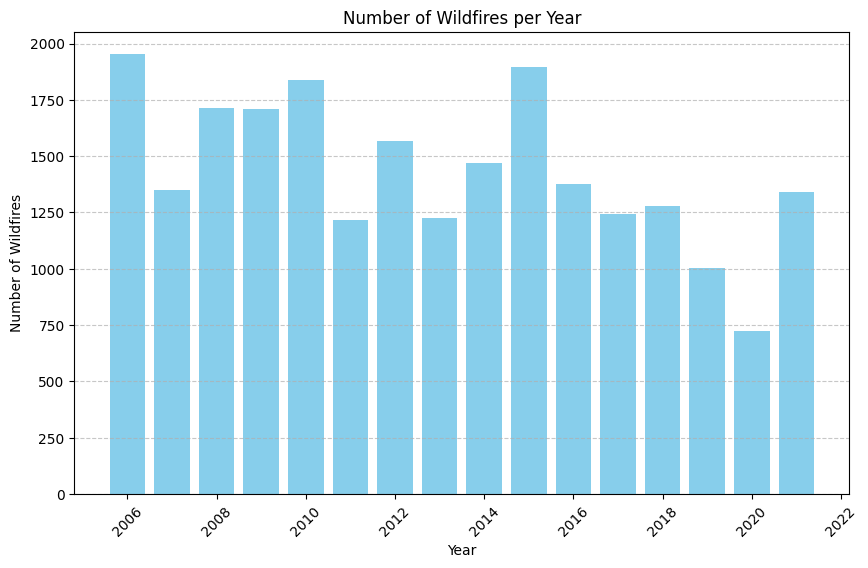

In [ ]:
wildfire_counts = df['fire_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(wildfire_counts.index, wildfire_counts.values, color='skyblue')
plt.title('Number of Wildfires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### A breakdown for size classes
- A class = 0 to 0.1 ha
- B class > 0.1 ha to 4.0 ha
- C class > 4.0 ha to 40.0 ha
- D class > 40.0 ha to 200 ha
- E class > 200 ha

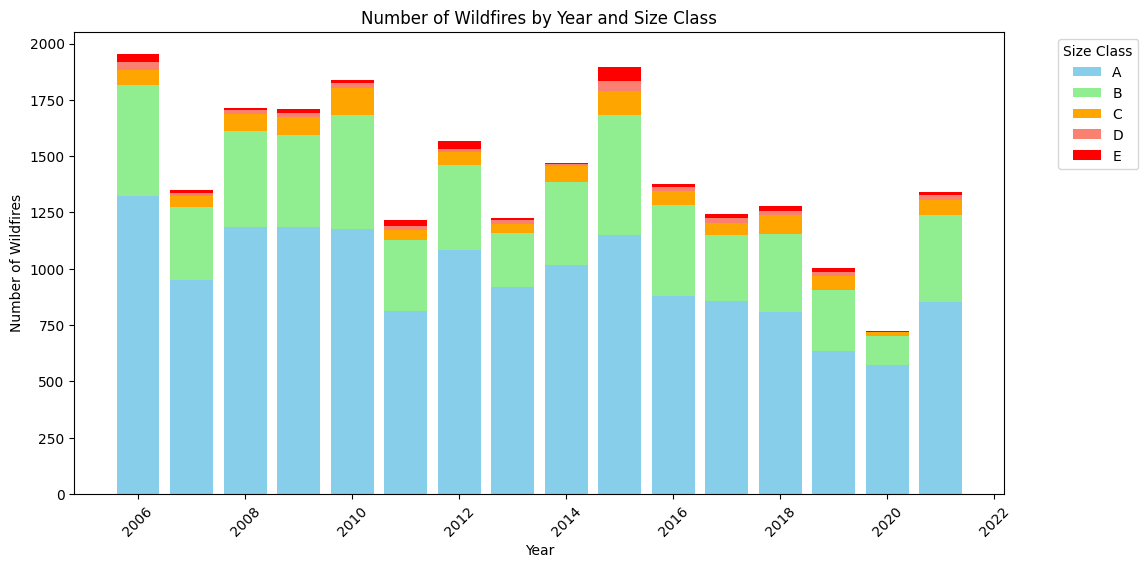

In [ ]:
size_class_counts = df.groupby(['fire_year', 'size_class']).size().unstack(fill_value=0)
colors = {'A': 'skyblue',
          'B': 'lightgreen',
          'C': 'orange',
          'D': 'salmon',
          'E': 'red'}

plt.figure(figsize=(12,6))

for i, size_class in enumerate(size_class_counts.columns):
  plt.bar(size_class_counts.index, size_class_counts[size_class], bottom=size_class_counts.iloc[:, :i].sum(axis=1),
          color=colors[size_class], label=size_class)
# Add labels and legend
plt.title('Number of Wildfires by Year and Size Class')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Size Class', bbox_to_anchor=(1.05, 1), loc='upper left')


## Causes of fires

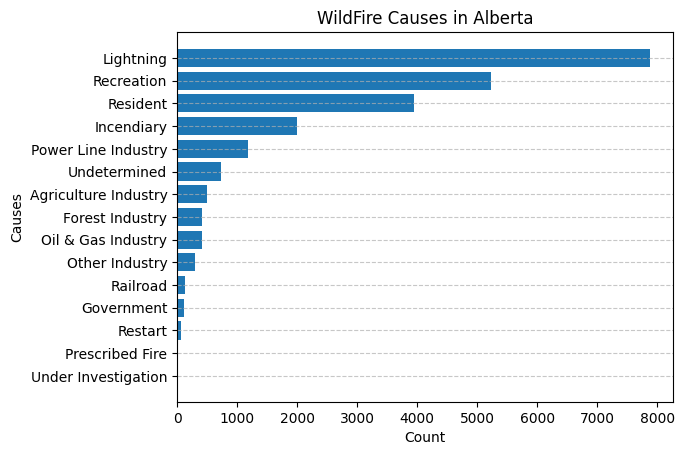

In [ ]:
cause_counts = df['general_cause_desc'].value_counts().sort_values()

plt.barh(cause_counts.index, cause_counts.values)
plt.title('WildFire Causes in Alberta')
plt.xlabel('Count')
plt.ylabel('Causes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

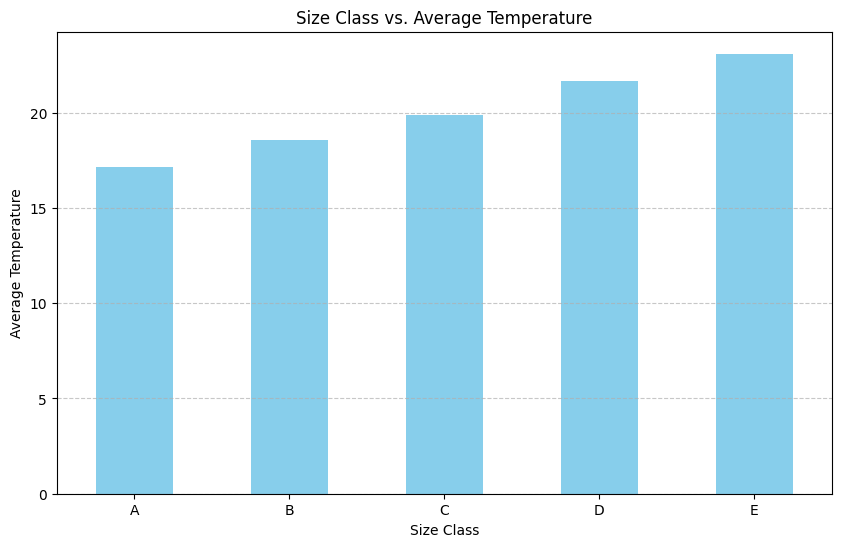

In [ ]:
# Group the DataFrame by 'size_class' and calculate the mean temperature for each size class
temperature_by_size_class = df.groupby('size_class')['temperature'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
temperature_by_size_class.plot(kind='bar', color='skyblue')
plt.title('Size Class vs. Average Temperature')
plt.xlabel('Size Class')
plt.ylabel('Average Temperature')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()

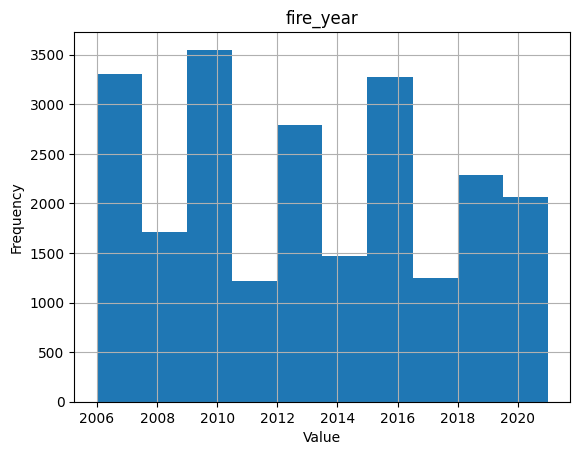

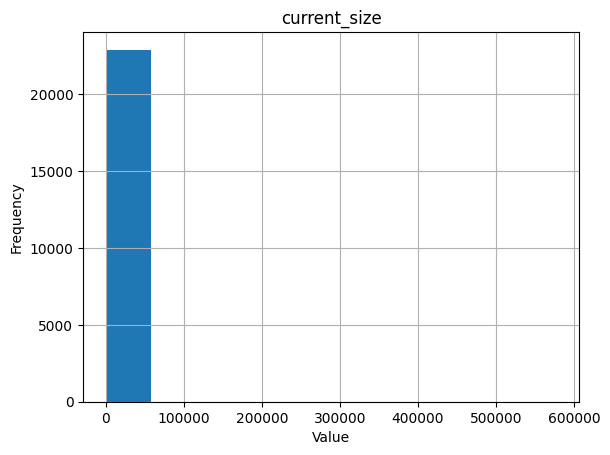

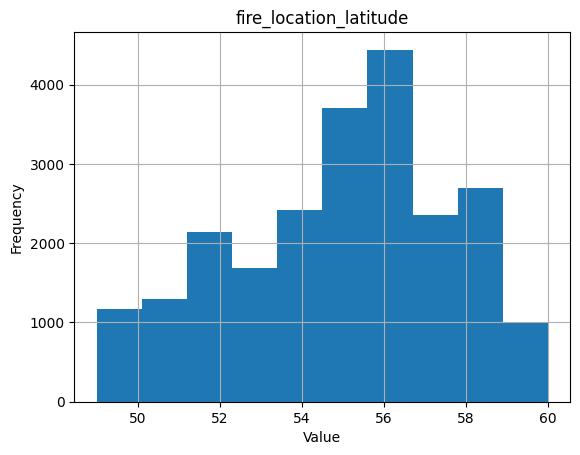

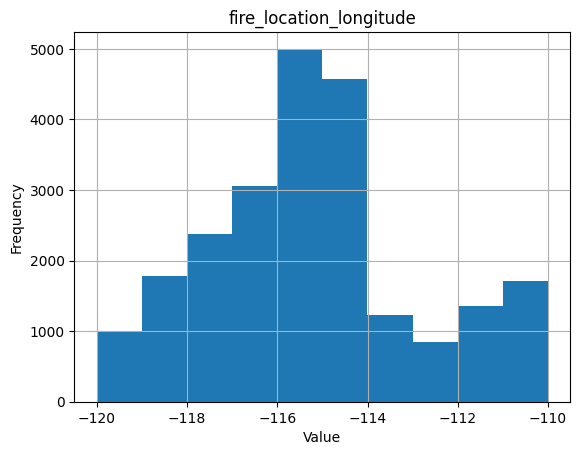

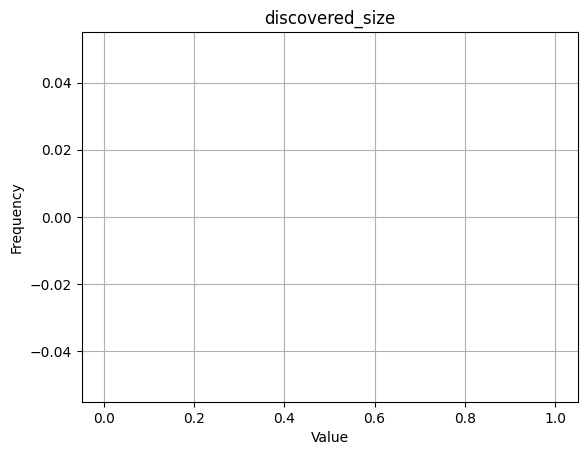

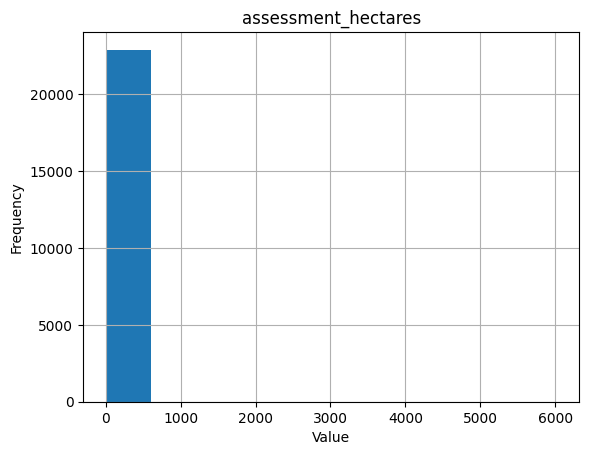

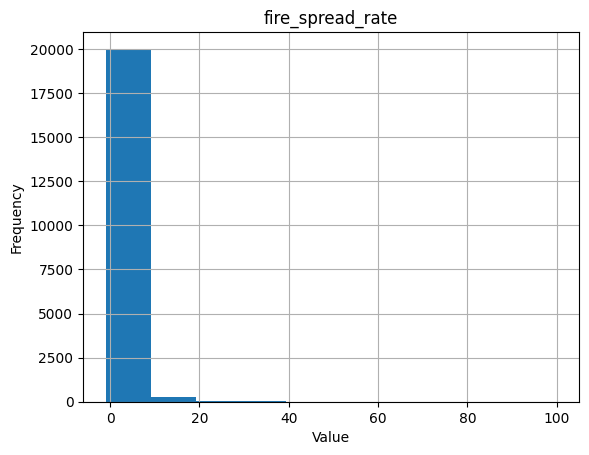

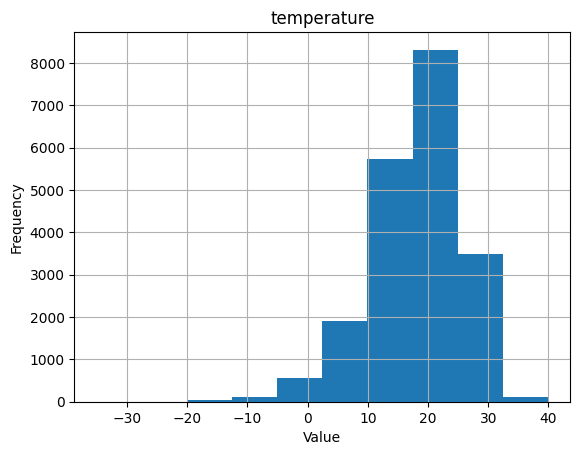

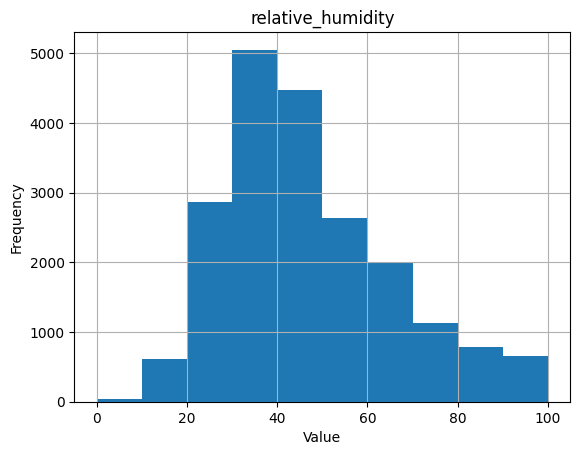

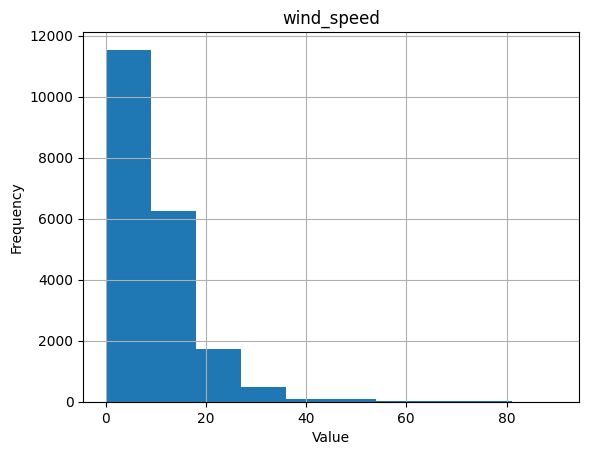

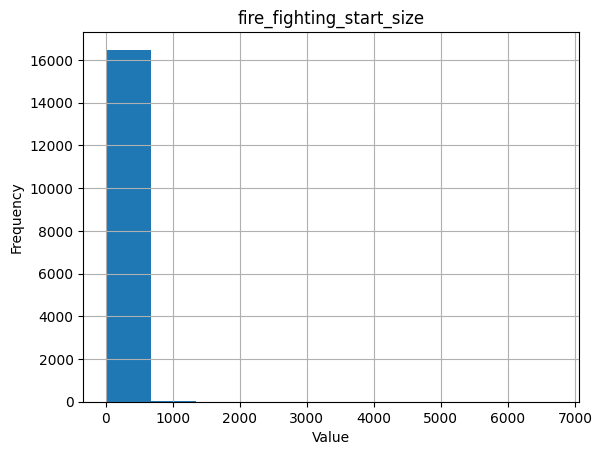

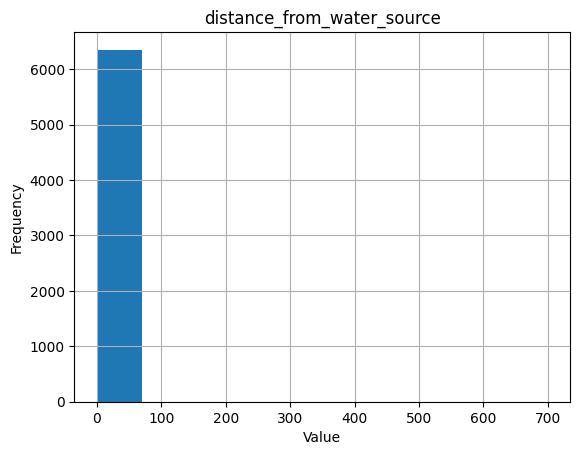

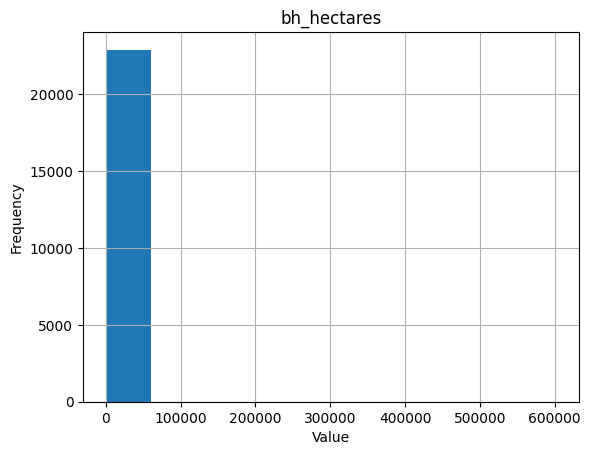

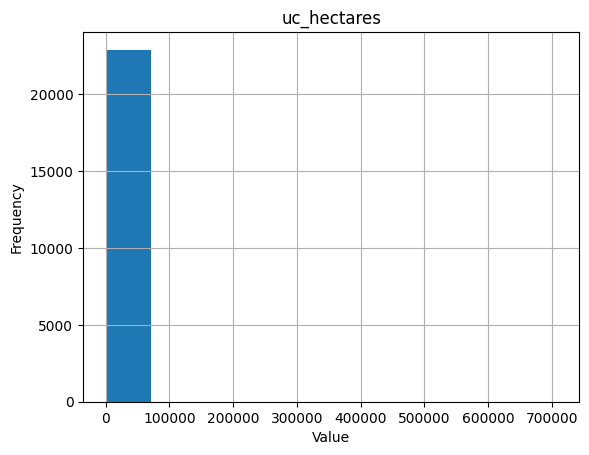

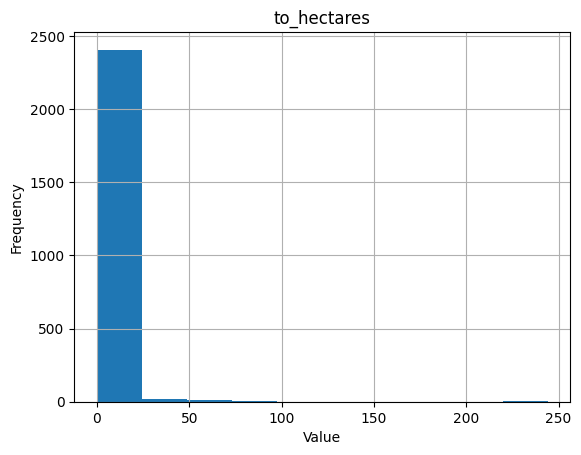

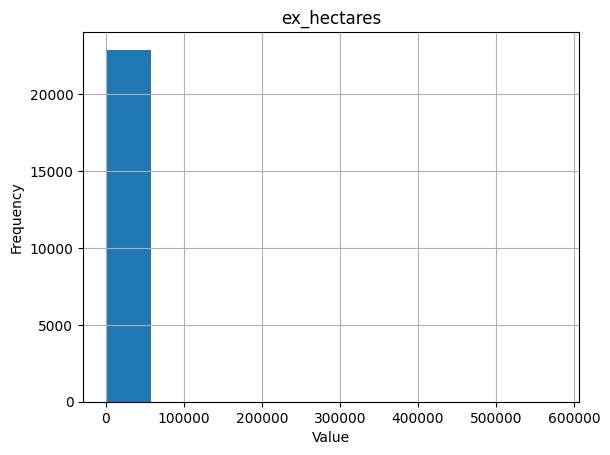

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure()  # Create a new figure for each histogram
    df[col].hist()  # Plot histogram for the current column
    plt.title(col)  # Set the title of the histogram to the column name
    plt.xlabel('Value')  # Set label for x-axis
    plt.ylabel('Frequency')  # Set label for y-axis
    plt.show()  # Display the histogram
